<a href="https://colab.research.google.com/github/merriekay/CS167Code/blob/main/Day17_Notes_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 17 Notes (fall 2021)
Perceptron and Gradient Descent

In [2]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
iris_data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/irisData.csv')

Mounted at /content/drive


In [3]:
#create dummy variables for species in Iris data
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
iris_dummies.head()

,sepal length,sepal width,petal length,petal width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics


#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")


predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
#target = "species_Iris-virginica"
#target = "species_Iris-setosa"
target = "species_Iris-versicolor"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
iris_perc_predictions = perc.predict(test_data)

#output accuracy
print("Setosa accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))

Setosa accuracy: 0.6333333333333333


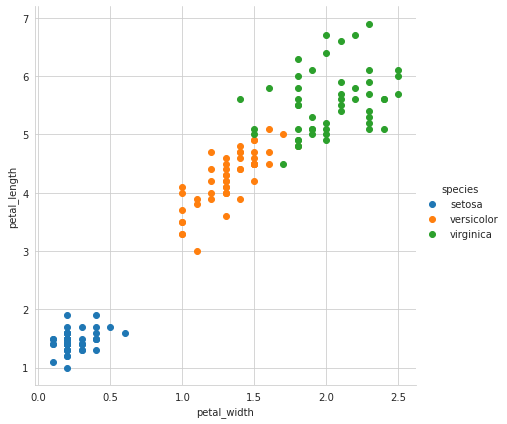

In [6]:
#let's take a look at the data:
import matplotlib.pyplot as plt
import seaborn as sns
 
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'petal_width',
                              'petal_length').add_legend()


In [8]:
#Boston Housing Data

from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pandas.read_csv('/content/drive/MyDrive/CS167_S21/CS167_datasets/boston_housing.csv') 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


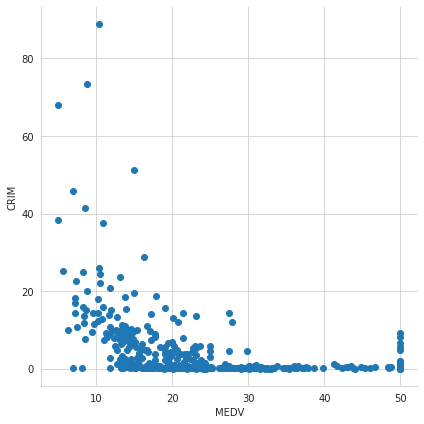

In [14]:
sns.set_style("whitegrid")
 
# sepal_length, petal_length are iris
# feature data height used to define
# Height of graph whereas hue store the
# class of iris dataset.
sns.FacetGrid(data,height = 6).map(plt.scatter,'MEDV','CRIM')

In [17]:
#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDRegressor

predictors = data.columns.drop('MEDV')
target = 'MEDV'

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
sgd = SGDRegressor()
sgd.fit(train_data,train_sln)
medv_sgd_predictions = sgd.predict(test_data)

#output accuracy
print("SGD Regression R2:", metrics.r2_score(test_sln, medv_sgd_predictions))
print("SGD Regression MAE:", metrics.mean_absolute_error(test_sln, medv_sgd_predictions))
print("SGD Regression MSE:", metrics.mean_squared_error(test_sln, medv_sgd_predictions))

SGD Regression R2: -8.328468902516626e+25
SGD Regression MAE: 57856527993833.305
SGD Regression MSE: 3.866984960055795e+27


In [18]:
#Guessing that the huge error comes from not normalizing the data:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

#load up scikit-learn Perceptron
sgd = SGDRegressor()
sgd.fit(train_data_normalized,train_sln)
medv_sgd_predictions = sgd.predict(test_data_normalized)

#output accuracy
print("SGD Regression R2:", metrics.r2_score(test_sln, medv_sgd_predictions))
print("SGD Regression MAE:", metrics.mean_absolute_error(test_sln, medv_sgd_predictions))
print("SGD Regression MSE:", metrics.mean_squared_error(test_sln, medv_sgd_predictions))

SGD Regression R2: 0.5221394304912641
SGD Regression MAE: 3.3988665765262414
SGD Regression MSE: 22.187507174765365


In [19]:
sgd = SGDRegressor(learning_rate="constant", eta0=0.000001, max_iter=10000000)
sgd.fit(train_data, train_sln)

pred = sgd.predict(test_data)

print("SGD Regression R2:", metrics.r2_score(test_sln, pred))
print("SGD Regression MAE:", metrics.mean_absolute_error(test_sln, pred))
print("SGD Regression MSE:", metrics.mean_squared_error(test_sln, pred))

SGD Regression R2: -0.39675735754525165
SGD Regression MAE: 6.26395705998129
SGD Regression MSE: 64.85273292961041


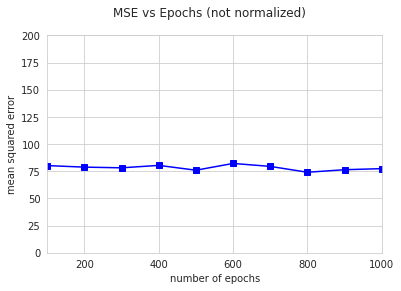

In [20]:
#regression_SGD performs Stochastic Gradient Descent
#input: training data, testing, data, traing solution, testing solutions, # of epochs
#return: the mean squared error
def regression_SGD(train, test, train_sln, test_sln, epochs):
    sgd = SGDRegressor(eta0=0.000001, max_iter=epochs)
    sgd.fit(train, train_sln)
    predictions = sgd.predict(test)
    mse = metrics.mean_squared_error(test_sln,predictions)
    return mse

# run the data over this range of epochs 1 through 10
epoch_list = range(100, 1001, 100)
epoch_accuracies = []

for epoch in epoch_list:
    r = regression_SGD(train_data, test_data, train_sln, test_sln, epoch)
    epoch_accuracies.append(r)
    
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Epochs (not normalized)',fontsize=12)
plt.xlabel('number of epochs')
plt.ylabel('mean squared error')
plt.plot(epoch_list,epoch_accuracies,'bs-')

plt.axis([100,1001,0,200])

plt.show()

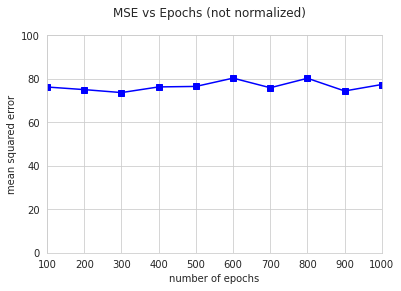

In [23]:

#regression_SGD performs Stochastic Gradient Descent
#input: training data, testing, data, traing solution, testing solutions, # of epochs
#return: the mean squared error
def regression_SGD(train, test, train_sln, test_sln, epochs):
    sgd = SGDRegressor(eta0=0.000001, max_iter=epochs) #let's try with setting eta to be very small
    sgd.fit(train, train_sln)
    predictions = sgd.predict(test)
    mse = metrics.mean_squared_error(test_sln,predictions)
    return mse

# run the data over this range of epochs 1 through 10
epoch_list = range(100,1001,100)
epoch_accuracies = []

for epoch in epoch_list:
    r = regression_SGD(train_data, test_data, train_sln, test_sln, epoch)
    epoch_accuracies.append(r)
    
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Epochs (not normalized)',fontsize=12)
plt.xlabel('number of epochs')
plt.ylabel('mean squared error')
plt.plot(epoch_list,epoch_accuracies,'bs-')

plt.axis([100,1000,0,100])

plt.show()

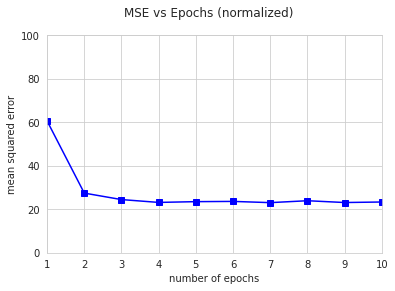

In [22]:
#normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)

#regression_SGD performs Stochastic Gradient Descent
#input: training data, testing, data, traing solution, testing solutions, # of epochs
#return: the mean squared error
def regression_SGD(train, test, train_sln, test_sln, epochs):
    sgd = SGDRegressor(max_iter=epochs)
    sgd.fit(train, train_sln)
    predictions = sgd.predict(test)
    mse = metrics.mean_squared_error(test_sln,predictions)
    return mse

# run the data over this range of epochs 1 through 10
epoch_list = range(1, 11)
epoch_accuracies = []

for epoch in epoch_list:
    r = regression_SGD(train_data_normalized, test_data_normalized, train_sln, test_sln, epoch)
    epoch_accuracies.append(r)

# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.suptitle('MSE vs Epochs (normalized)',fontsize=12)
plt.xlabel('number of epochs')
plt.ylabel('mean squared error')
plt.plot(epoch_list,epoch_accuracies,'bs-')

plt.axis([1,10,0,100])

plt.show()